![example](images/director_shot.jpeg)

# Project Title

**Authors:** Chris Helmerson, Nick Kennedy, Samira Chatrathi
***

## Overview

In this project
 one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [69]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [70]:
# Load file
df = pd.read_csv('tn.movie_budgets.csv')

# Remove "$" and "," from production_budget columns & convert to millions
df['production_budget'] = df['production_budget'].str.replace(' ', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str[:-6]

# Remove "$" and "," from domestic_gross columns & convert to millions
df['domestic_gross'] = df['domestic_gross'].str.replace(' ', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str[:-6]

# Remove "$" and "," from worldwide_gross columns & convert to millions
df['worldwide_gross'] = df['worldwide_gross'].str.replace(' ', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str[:-6]

# Filter blank strings
df = df[df.production_budget != '']
df = df[df.worldwide_gross != '']
df = df[df.domestic_gross != '']

# Change figures from str to int class type
df['production_budget'] = df['production_budget'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

# Create international_gross col
df['international_gross'] = df['worldwide_gross'] - df['domestic_gross']

# Filter international_gross
## possibly remove
df = df[df.international_gross != 0]

df








,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425,760,2776,2016
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410,241,1045,804
2,3,"Jun 7, 2019",Dark Phoenix,350,42,149,107
3,4,"May 1, 2015",Avengers: Age of Ultron,330,459,1403,944
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317,620,1316,696
...,...,...,...,...,...,...,...
5242,43,"Aug 3, 2005",Junebug,1,2,3,1
5243,44,"Aug 1, 2008",Frozen River,1,2,6,4
5244,45,"Nov 21, 2001",Sidewalks of New York,1,2,3,1
5246,47,"Sep 29, 2000",The Broken Hearts Club: A Romantic Comedy,1,1,2,1


In [71]:
#Create copy of df
useful_columns = ['Movie', 'Genre', 'Production_Budget', 'Domestic_Gross', 'International_Gross', 'Worldwide_Gross']
same_title_list = []

#combined_df = pd.DataFrame(columns=useful_columns)
combined_df = [useful_columns]

#convert both title columns to lists for conversion later
genre_title_list = genre_df['title'].tolist()
gross_title_list = df['movie'].tolist()

#Create duplicate title list
for title in genre_title_list:
    for movie in gross_title_list:
        if title == movie:
            same_title_list.append(title)
        else:
            continue

#convert same_title_list to DF?
            
#pd.DataFrame(d)

#Add genre_ids to combined_df
#if df['movie'] == genre_df['title']:
    
print(len(same_title_list))

NameError: name 'genre_df' is not defined

In [72]:
for title in :
    d.append(
        {
            'Player': p,
            'Team': p.team,
            'Passer Rating':  p.passer_rating()
        }
    )

SyntaxError: invalid syntax (<ipython-input-72-fb1c6d1fcad9>, line 1)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [73]:
# Here we decided to add a boolean to see the difference between 

for x in imdb_genres:
    tn_fixednum_df[x] = (tn_fixednum_df['genres'].str.contains(x))






NameError: name 'imdb_genres' is not defined

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [74]:
# Here we made our x value = action
#bom_genres_1_df['Action'] = (bom_genres_1_df['genre_imdb'].str.contains('Action'))
for x in imdb_genres:
    tn_fixednum_df[x] = (tn_fixednum_df['genres'].str.contains(x)

tn_fixednum_df.head()





SyntaxError: invalid syntax (<ipython-input-74-8c833cc0be05>, line 6)

In [75]:
dfchris = pd.read_csv('Merged_DataFrame_CH.csv')
dfchris

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,0,1,18-Dec-09,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,2,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,3,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
4,4,9,17-Nov-17,Justice League,300,229,655,426,"[action, adventure, fantasy, sci-fi]"
...,...,...,...,...,...,...,...,...,...
1560,1560,33,19-Oct-12,The Sessions,1,6,11,5,"[drama, romance, comedy]"
1561,1561,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3,"[drama, thriller]"
1562,1562,52,7-Dec-01,No Man's Land,1,1,2,1,[drama]
1563,1563,52,7-Dec-01,No Man's Land,1,1,2,1,"[drama, crime, western, thriller]"


In [76]:
dfnick = pd.read_csv('final_data_nk.csv')
dfnick

,Unnamed: 0,Unnamed: 0.1,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,...,Fantasy,Adventure,Documentary,Thriller,Comedy,Reality-TV,Music,History,Action,Animation
0,0,20,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,...,False,False,False,False,True,False,False,False,True,True
1,1,33,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,...,True,True,False,False,False,False,False,False,True,False
2,2,40,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,48,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,...,False,True,False,False,False,False,False,False,False,False
4,4,54,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,3892,145843,trapped,tt9877596,Trapped,Trapped,2016,NaN,NaN,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,3893,145937,the promise,tt9889072,The Promise,The Promise,2017,NaN,Drama,78,...,False,False,False,False,False,False,False,False,False,False
3894,3894,145986,sublime,tt9893078,Sublime,Sublime,2019,NaN,Documentary,30,...,False,False,True,False,False,False,False,False,False,False
3895,3895,146025,columbus,tt9899880,Columbus,Columbus,2018,85.0,Comedy,93,...,False,False,False,False,True,False,False,False,False,False


In [77]:
dfnick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   Unnamed: 0.1        3897 non-null   int64  
 2   clean_title         3897 non-null   object 
 3   movie_id            3897 non-null   object 
 4   primary_title       3897 non-null   object 
 5   original_title      3896 non-null   object 
 6   start_year          3897 non-null   int64  
 7   runtime_minutes     3401 non-null   float64
 8   genres              3824 non-null   object 
 9   id                  3897 non-null   int64  
 10  release_date        3897 non-null   object 
 11  movie               3897 non-null   object 
 12  production_budget   3897 non-null   int64  
 13  domestic_gross      3897 non-null   int64  
 14  worldwide_gross     3897 non-null   int64  
 15  foreign_gross       3897 non-null   int64  
 16  title 

In [78]:
dfchris

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,0,1,18-Dec-09,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,2,4,1-May-15,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,3,7,27-Apr-18,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
4,4,9,17-Nov-17,Justice League,300,229,655,426,"[action, adventure, fantasy, sci-fi]"
...,...,...,...,...,...,...,...,...,...
1560,1560,33,19-Oct-12,The Sessions,1,6,11,5,"[drama, romance, comedy]"
1561,1561,42,21-Oct-11,Martha Marcy May Marlene,1,2,5,3,"[drama, thriller]"
1562,1562,52,7-Dec-01,No Man's Land,1,1,2,1,[drama]
1563,1563,52,7-Dec-01,No Man's Land,1,1,2,1,"[drama, crime, western, thriller]"


In [79]:
dfchris['release_date']= pd.to_datetime(dfchris['release_date'])
dfchris['release_date']

0      2009-12-18
1      2011-05-20
2      2015-05-01
3      2018-04-27
4      2017-11-17
          ...    
1560   2012-10-19
1561   2011-10-21
1562   2001-12-07
1563   2001-12-07
1564   2001-12-07
Name: release_date, Length: 1565, dtype: datetime64[ns]

In [80]:
import datetime

In [81]:
dfchris['release_date'] = pd.DatetimeIndex(dfchris['release_date']).year

In [82]:
dfchris

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,genre_ids
0,0,1,2009,Avatar,425,760,2776,2016,"[action, adventure, fantasy, sci-fi]"
1,1,2,2011,Pirates of the Caribbean: On Stranger Tides,410,241,1045,804,"[adventure, action, fantasy]"
2,2,4,2015,Avengers: Age of Ultron,330,459,1403,944,"[action, adventure, sci-fi]"
3,3,7,2018,Avengers: Infinity War,300,678,2048,1370,"[adventure, action, fantasy]"
4,4,9,2017,Justice League,300,229,655,426,"[action, adventure, fantasy, sci-fi]"
...,...,...,...,...,...,...,...,...,...
1560,1560,33,2012,The Sessions,1,6,11,5,"[drama, romance, comedy]"
1561,1561,42,2011,Martha Marcy May Marlene,1,2,5,3,"[drama, thriller]"
1562,1562,52,2001,No Man's Land,1,1,2,1,[drama]
1563,1563,52,2001,No Man's Land,1,1,2,1,"[drama, crime, western, thriller]"


In [83]:
dfnick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3897 non-null   int64  
 1   Unnamed: 0.1        3897 non-null   int64  
 2   clean_title         3897 non-null   object 
 3   movie_id            3897 non-null   object 
 4   primary_title       3897 non-null   object 
 5   original_title      3896 non-null   object 
 6   start_year          3897 non-null   int64  
 7   runtime_minutes     3401 non-null   float64
 8   genres              3824 non-null   object 
 9   id                  3897 non-null   int64  
 10  release_date        3897 non-null   object 
 11  movie               3897 non-null   object 
 12  production_budget   3897 non-null   int64  
 13  domestic_gross      3897 non-null   int64  
 14  worldwide_gross     3897 non-null   int64  
 15  foreign_gross       3897 non-null   int64  
 16  title 

In [84]:
dfnick['release_date']

0       31-Dec-12
1       18-Aug-95
2       19-Jun-15
3       22-Mar-13
4       25-Dec-13
          ...    
3892    20-Sep-02
3893    21-Apr-17
3894    13-Mar-07
3895     4-Aug-17
3896    12-Nov-10
Name: release_date, Length: 3897, dtype: object

In [85]:
dfnick['release_date']= pd.to_datetime(dfnick['release_date'])
dfnick['release_date']

0      2012-12-31
1      1995-08-18
2      2015-06-19
3      2013-03-22
4      2013-12-25
          ...    
3892   2002-09-20
3893   2017-04-21
3894   2007-03-13
3895   2017-08-04
3896   2010-11-12
Name: release_date, Length: 3897, dtype: datetime64[ns]

In [86]:
import datetime
dfnick['release_date'] = pd.DatetimeIndex(dfnick['release_date']).year
dfnick['release_date']

0       2012
1       1995
2       2015
3       2013
4       2013
        ... 
3892    2002
3893    2017
3894    2007
3895    2017
3896    2010
Name: release_date, Length: 3897, dtype: int64

In [87]:
dfmerged = pd.read_csv('merged_all.csv')
dfmerged

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Animation,averagerating,numvotes,release_date_CH,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,genre_ids
0,0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,...,True,1.9,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,1995-08-18,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,2015-06-19,...,NaN,7.5,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,2013-03-22,...,False,6.1,37886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013-12-25,...,False,7.3,275300.0,25-Dec-13,The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,"[adventure, comedy, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,3893,the promise,tt9889072,The Promise,The Promise,2017,NaN,Drama,78,2017-04-21,...,False,NaN,NaN,21-Apr-17,The Promise,90.0,8.0,10.0,2.0,"[history, romance, drama]"
5374,3894,sublime,tt9893078,Sublime,Sublime,2019,NaN,Documentary,30,2007-03-13,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5375,3895,columbus,tt9899880,Columbus,Columbus,2018,85.0,Comedy,93,2017-08-04,...,False,5.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5376,3896,unstoppable,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,19,2010-11-12,...,False,8.1,8.0,12-Nov-10,Unstoppable,95.0,81.0,165.0,84.0,"[action, thriller]"


In [88]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378 entries, 0 to 5377
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5378 non-null   int64  
 1   clean_title           5378 non-null   object 
 2   movie_id              5378 non-null   object 
 3   primary_title         5378 non-null   object 
 4   original_title        5377 non-null   object 
 5   start_year            5378 non-null   int64  
 6   runtime_minutes       4682 non-null   float64
 7   genres                5279 non-null   object 
 8   id                    5378 non-null   int64  
 9   release_date          5378 non-null   object 
 10  movie                 5378 non-null   object 
 11  production_budget     5378 non-null   int64  
 12  domestic_gross        5378 non-null   int64  
 13  worldwide_gross       5378 non-null   int64  
 14  foreign_gross         5378 non-null   int64  
 15  title                

In [1]:
#let's load our cleaned data frame and looking at the rows and columns

import pandas as pd
masterdf = pd.read_csv('master_data_raw.csv')
masterdf

,Unnamed: 0,clean_title,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,...,Animation,averagerating,numvotes,release_date_CH,movie_CH,production_budget_CH,domestic_gross_CH,worldwide_gross_CH,international_gross,genre_ids
0,0,foodfight!,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,...,True,1.9,8248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,mortal kombat,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,1995-08-18,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,the overnight,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,2015-06-19,...,NaN,7.5,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,on the road,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,2013-03-22,...,False,6.1,37886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,the secret life of walter mitty,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013-12-25,...,False,7.3,275300.0,"Dec 25, 2013",The Secret Life of Walter Mitty,91.0,58.0,187.0,129.0,"[adventure, comedy, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,3892,trapped,tt9877596,Trapped,Trapped,2016,NaN,NaN,87,2002-09-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,3893,the promise,tt9889072,The Promise,The Promise,2017,NaN,Drama,78,2017-04-21,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,3894,sublime,tt9893078,Sublime,Sublime,2019,NaN,Documentary,30,2007-03-13,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3895,3895,columbus,tt9899880,Columbus,Columbus,2018,85.0,Comedy,93,2017-08-04,...,False,5.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3897 non-null   int64  
 1   clean_title           3897 non-null   object 
 2   movie_id              3897 non-null   object 
 3   primary_title         3897 non-null   object 
 4   original_title        3896 non-null   object 
 5   start_year            3897 non-null   int64  
 6   runtime_minutes       3401 non-null   float64
 7   genres                3824 non-null   object 
 8   id                    3897 non-null   int64  
 9   release_date          3897 non-null   object 
 10  movie                 3897 non-null   object 
 11  production_budget     3897 non-null   int64  
 12  domestic_gross        3897 non-null   int64  
 13  worldwide_gross       3897 non-null   int64  
 14  foreign_gross         3897 non-null   int64  
 15  title                

In [3]:
#our selected release date is in object format...we want to change that to an integer
import datetime
masterdf['release_date'] = pd.DatetimeIndex(masterdf['release_date']).year
masterdf['release_date']


0       2012
1       1995
2       2015
3       2013
4       2013
        ... 
3892    2002
3893    2017
3894    2007
3895    2017
3896    2010
Name: release_date, Length: 3897, dtype: int64

In [4]:
#now we want to create our visualizaiton to be filtered with years between 2014 and 2018

yr2014_yr2018 = masterdf[(masterdf['release_date'] >= 2014) & (masterdf['release_date'] <= 2018)]
xrange = yr2014_yr2018['release_date']


<ipython-input-24-7836e5d10ade>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date')


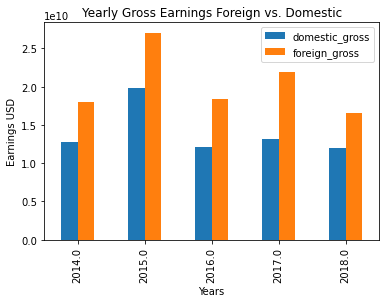

In [24]:
#let's create our graph where we group our domestic and foreign gross data with our release dates range
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['2014', '2015', '2016', '2017', '2018']


ax = masterdf.groupby(xrange)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date')

ax.plot.bar(stacked=False, title = 'Yearly Gross Earnings Foreign vs. Domestic', ylabel = 'Earnings USD', xlabel = 'Years')
        
;





<ipython-input-103-b210a1413a47>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = masterdf.groupby(yr2018)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date')


KeyError: "None of [Index(['2014', '2015', '2016', '2017', '2018'], dtype='object')] are in the [columns]"

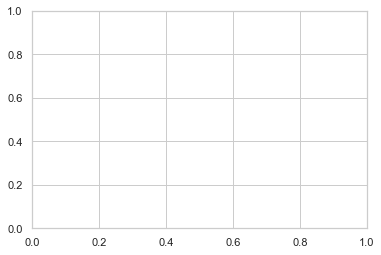

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline


labels = ['2014', '2015', '2016', '2017', '2018']


fig, ax = plt.subplots()

ax = masterdf.groupby(yr2018)['domestic_gross', 'foreign_gross'].sum().sort_values('release_date')

ax.plot.bar(labels, stacked = False)


ax.set_ylabel('Gross Earnings USD')
ax.set_title('Yearly Gross Earnings Foreign vs. Domestic')
ax.legend()

plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

In [ ]:
import cpi 

cpi.update()
dom_grossfilt = cpi.inflate(masterdf['domestic_gross'], masterdf['release_date'], to = 2018)

for_grossfilt = cpi.inflate(masterdf['foreign_gross'], masterdf['release_date'], to= 2018)

dom_grossfilt()

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***